<a href="https://colab.research.google.com/github/mcalmeida13/Data-Cleaning/blob/master/My_news_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
from zipfile import ZipFile
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.linear_model import SGDClassifier
import logging
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
% matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [0]:
#filename = "/kaggle/input/news-category-dataset/News_Category_Dataset_v2.json"

In [0]:
df = pd.read_json("/content/News_Category_Dataset_v2.json",lines = True)

In [4]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [5]:
#Data types
df.dtypes

category                     object
headline                     object
authors                      object
link                         object
short_description            object
date                 datetime64[ns]
dtype: object

In [6]:
df.describe()

,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://www.newre...,,2013-01-17 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


In [7]:
#Dropping somecolumns for bette visualization
df.drop(["authors","link","date"], axis=1, inplace = True)
df.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [8]:
df.describe()

,category,headline,short_description
count,200853,200853,200853
unique,41,199344,178353
top,POLITICS,Sunday Roundup,
freq,32739,90,19712


In [9]:
categories_count=df['category'].value_counts()
categories_count.to_frame()


,category
POLITICS,32739
WELLNESS,17827
ENTERTAINMENT,16058
TRAVEL,9887
STYLE & BEAUTY,9649
PARENTING,8677
HEALTHY LIVING,6694
QUEER VOICES,6314
FOOD & DRINK,6226
BUSINESS,5937


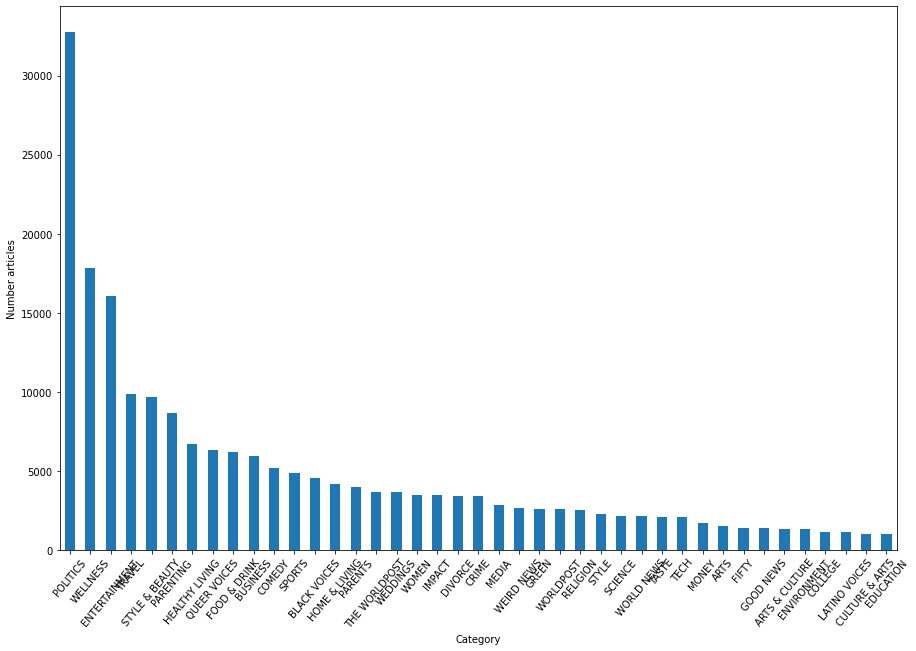

In [10]:
plt.figure(figsize=(15,10))
categories_count.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Category")
plt.ylabel("Number articles")
plt.show()

Set `"WORLDPOST"` and `"THE WORLDPOST"` as the same category

In [0]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [12]:
df['category_id'] = df['category'].factorize()[0]
from io import StringIO
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head()

,category,headline,short_description,category_id
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",1


In [13]:
df2 = df[['category','category_id']]
codes = df2.drop_duplicates(keep = 'last', inplace=False).sort_values(by = 'category_id')
codes

,category,category_id
199539,CRIME,0
200839,ENTERTAINMENT,1
29757,WORLD NEWS,2
200827,IMPACT,3
124983,POLITICS,4
124863,WEIRD NEWS,5
200752,BLACK VOICES,6
124984,WOMEN,7
200814,COMEDY,8
200824,QUEER VOICES,9


# Data Pre-Processing

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)    
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [16]:
def Format_data(df): 
    # iterate over all the rows 
    for i in range(df.shape[0]): 
  
        # reassign the values to the product column 
        # we first strip the whitespaces using strip() function 
        # then we capitalize the first letter using capitalize() function 
        df.iat[i, 1]= clean_txt(df.iat[i, 1])
  
# Let's call the function 
Format_data(df) 
  
# Print the Dataframe 
print(df) 

             category  ... category_id
0               CRIME  ...           0
1       ENTERTAINMENT  ...           1
2       ENTERTAINMENT  ...           1
3       ENTERTAINMENT  ...           1
4       ENTERTAINMENT  ...           1
...               ...  ...         ...
200848           TECH  ...          14
200849         SPORTS  ...          10
200850         SPORTS  ...          10
200851         SPORTS  ...          10
200852         SPORTS  ...          10

[200853 rows x 4 columns]


In [17]:
df["headline"]

0                                mass shoot texas last week
1         smith join diplo nicky jam world cup official ...
2                                hugh grant marry first age
3         jim carrey blast castrato adam schiff democrat...
4         julianna margulies use donald trump poop bag p...
                                ...                        
200848    rim ceo thorsten heins significant plan blackb...
200849    maria sharapova stun victoria azarenka austral...
200850    giants patriots jet colts among improbable sup...
200851           aldon smith arrest ers linebacker bust dui
200852       dwight howard rip teammates magic loss hornets
Name: headline, Length: 200853, dtype: object

In [0]:
df['text'] = df['headline'] + " " + df['short_description']

In [26]:
def Format_data(df): 
    # iterate over all the rows 
    for i in range(df.shape[0]): 
  
        # reassign the values to the product column 
        # we first strip the whitespaces using strip() function 
        # then we capitalize the first letter using capitalize() function 
        df.iat[i, 1]= clean_txt(df.iat[i, 1])
  
# Let's call the function 
Format_data(df) 
  
# Print the Dataframe 
print(df) 

             category  ...                                               text
0               CRIME  ...  mass shoot texas last week She left her husban...
1       ENTERTAINMENT  ...  smith join diplo nicky jam world cup official ...
2       ENTERTAINMENT  ...  hugh grant marry first age The actor and his l...
3       ENTERTAINMENT  ...  jim carrey blast castrato adam schiff democrat...
4       ENTERTAINMENT  ...  julianna margulies use donald trump poop bag p...
...               ...  ...                                                ...
200848           TECH  ...  rim ceo thorsten heins significant plan blackb...
200849         SPORTS  ...  maria sharapova stun victoria azarenka austral...
200850         SPORTS  ...  giants patriots jet colts among improbable sup...
200851         SPORTS  ...  aldon smith arrest ers linebacker bust dui COR...
200852         SPORTS  ...  dwight howard rip teammates magic loss hornets...

[200853 rows x 5 columns]


In [29]:

def create_tf_matrix(category):
    return vectorizer.transform(df[df.category == category].text)

def create_term_freq(matrix, cat):
  category_words = matrix.sum(axis=0)
  category_words_freq = [(word, category_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  return pd.DataFrame(list(sorted(category_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms', cat])

for cat in df.category.unique():
  print("Top 10 terms for: ", cat)
  df_right = create_term_freq(create_tf_matrix(cat), cat).head(10)
  print(df_right)
  print("###############")
  if cat != 'CRIME':
    df_top5_words = df_top5_words.merge(df_right, how='outer')
  else:
    df_top5_words = df_right.copy()
  print(df_top5_words.shape )

  

Top 10 terms for:  CRIME
     Terms       CRIME
0     home  122.780746
1    crime   61.279350
2    black   54.603386
3    drink   50.149849
4     live   47.139003
5   parent   42.693406
6    women   42.479414
7  college   26.158697
8     good   24.768079
9    money   22.500460
###############
(10, 2)
Top 10 terms for:  ENTERTAINMENT
    Terms  ENTERTAINMENT
0    live     356.901616
1    good     336.142522
2   world     331.985059
3   women     239.054035
4   black     204.679678
5    home     153.132509
6  comedy     145.462310
7   media     114.164769
8   voice     109.243520
9  parent      79.957844
###############
(14, 3)
Top 10 terms for:  WORLD NEWS
      Terms  WORLD NEWS
0     world  107.477013
1     women   57.656851
2     media   30.497552
3      live   27.490777
4      home   26.794834
5      good   15.763163
6     black   13.506478
7    travel   12.679764
8      food   12.658104
9  politics   10.013183
###############
(17, 4)
Top 10 terms for:  IMPACT
       Terms      IMPA

In [30]:
df_top5_words.fillna(0, inplace=True )
df_top5_words.set_index('Terms', inplace=True)
df_top5_words.shape

(37, 40)

In [32]:
!pip install textacy

     |████████████████████████████████| 215kB 1.4MB/s 
     |████████████████████████████████| 481kB 4.2MB/s 
     |████████████████████████████████| 3.0MB 6.8MB/s 
     |████████████████████████████████| 143kB 11.5MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1257034 sha256=be9a2dacb0067e0b9ed40d1b3bf1bc45cbf3c3d44bb6bc9b4e13024d85ab1c98
  Stored in directory: /root/.cache/pip/wheels/64/2a/18/d962b614e055577e7d9a3e4813e0742f822ca9c8800cc3783a
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=73005 sha256=ef8c1cc61934e03fa0540234c761ad8e8b29df6dcdb2b63d9bdf1e9ae53e0728
  Stored in directory: /root/.cache/pip/wheels/e8/fe/99/d8fa8f2ef7b82a625b0b77a84d319b0b50693659823c4effb4
Successfully built cytoolz jellyfish


In [0]:
from textacy.viz.termite import draw_termite_plot

In [0]:
df = df_top5_words.copy()
df_norm = (df) / (df.max() - df.min())

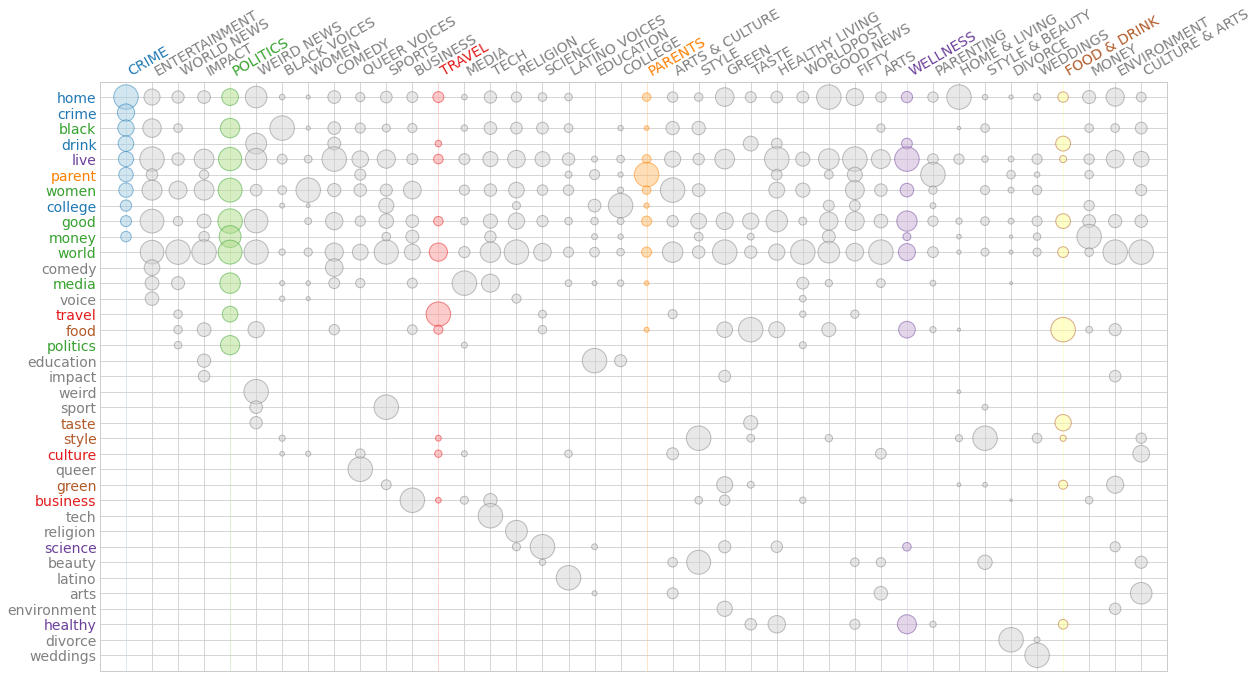

In [35]:
draw_termite_plot(np.array(df_norm.values),df_top5_words.columns,df_top5_words.index, highlight_cols=[0, 4, 12,20,30,36] )

In [39]:
df['qty']= 1
df_cat_year = df.groupby(['category', 'year']).agg({'polarity': 'mean', 
                                     'subjectivity': 'mean', 
                                    'len': 'mean',
                                     'qty':'count'})
df_cat_year.head(6)

KeyError: ignored

In [36]:
df_cat_year.reset_index(inplace=True)

NameError: ignored

In [0]:
fig1 = plt.figure(figsize=(15,25))
fig1.subplots_adjust(hspace = 1)
chrt = 0
for i, group in df_cat_year.groupby('category'):
    chrt += 1 
    ax = fig1.add_subplot(10,4, chrt)
    x = group['year']
    h = group['qty']
    ax.bar(x,h, color ="#86A3E2")
    ax.set_title(str(i))

In [19]:
vectorizer = TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = None, preprocessor=clean_txt)
vectorizer.fit(df.category)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.2, max_features=None,
                min_df=3, ngram_range=(1, 1), norm='l2',
                preprocessor=<function clean_txt at 0x7f75cf68e510>,
                smooth_idf=1, stop_words=None, strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.headline).toarray()
labels = df.category_id
features.shape

KeyboardInterrupt: ignored

In [0]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [0]:
politics_df = df[df.category == 'POLITICS']
politics_df.head()

In [0]:
politics_df['category'].value_counts().to_frame()

In [0]:
# Groupby by category
category = df.groupby("category")
category.head()

In [0]:
# Summary statistic of all category
summary=category.describe()
category.describe().head()

In [0]:
politics_df

In [0]:
# Start with one review:
politics_df[1:2]

In [0]:
# Start with one review:
text = str(politics_df[1:2])
print(type(text))


In [0]:
# Cleaning text and lower casing all words
for char in '-.,\n':
    text=text.replace(char,' ')
text1 = text.lower()
# split returns a list of words delimited by sequences of whitespace (including tabs, newlines, etc, like re's \s) 
word_list = text1.split()
word_list

In [0]:
from collections import Counter
Counter(word_list).most_common()

In [0]:

def freq(str): 
  
    # break the string into list of words 
    str_list = str.split() 
  
    # gives set of unique words 
    unique_words = set(str_list) 
      
    for words in unique_words : 
        if words != 'of' or words != 'The'and str_list.count(words) > 10 :
            print('Frequency of ', words , 'is :', str_list.count(words)) 

In [0]:
# calling the freq function 
    freq(text)

In [0]:

words = pd.DataFrame(lst, columns=cols)
 
print(words)

In [0]:

worddf = pd.DataFrame(word_data, columns = ['Word', 'Count'])
worddf.head()

In [0]:

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()